In [30]:
import numpy as np
import pandas as pd
# some imports to set up plotting
import matplotlib.pyplot as plt

# !pip install seaborn
import seaborn as sns

pd.set_option("display.precision", 2)
sns.set()
# Graphics in the Retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [2]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [3]:
df = pd.read_csv(DATA_URL + "telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.shape

(3333, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [7]:
df['Churn'] = df['Churn'].astype('int64')


In [8]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


In [11]:
df.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [12]:
df['Churn'].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [13]:
df['Churn'].value_counts(normalize=True)

Churn
0    0.86
1    0.14
Name: proportion, dtype: float64

In [14]:
df.sort_values(by='Total day charge', ascending=False).head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1
975,DE,129,510,No,No,0,334.3,118,56.83,192.1,104,16.33,191.0,83,8.59,10.4,6,2.81,0,1
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
1679,OK,82,510,No,No,0,329.8,73,56.07,208.3,120,17.71,267.1,102,12.02,10.6,6,2.86,0,1
2028,SD,93,510,No,No,0,328.1,106,55.78,151.7,89,12.89,303.5,114,13.66,8.7,3,2.35,1,1
197,TX,208,510,No,No,0,326.5,67,55.51,176.3,113,14.99,181.7,102,8.18,10.7,6,2.89,2,1


In [15]:
df.sort_values(by=['Churn', 'Total day charge'], ascending=[True, False]).head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0
1165,VT,50,415,Yes,Yes,26,307.1,94,52.21,289.4,78,24.60,174.9,109,7.87,8.0,3,2.16,0,0
3207,DC,93,408,No,Yes,22,306.2,123,52.05,189.7,83,16.12,240.3,107,10.81,11.7,2,3.16,0,0
2478,TN,123,415,No,Yes,34,305.2,80,51.88,156.5,109,13.30,280.0,81,12.60,13.2,7,3.56,1,0
1355,TX,50,408,No,Yes,31,302.7,93,51.46,240.5,119,20.44,193.9,103,8.73,13.6,14,3.67,3,0
1830,CT,50,408,No,No,0,301.7,82,51.29,167.1,118,14.20,72.2,89,3.25,10.5,6,2.84,1,0


In [16]:
df.select_dtypes(np.number)[df['Churn'] == 1].mean()

Account length            102.66
Area code                 437.82
Number vmail messages       5.12
Total day minutes         206.91
Total day calls           101.34
Total day charge           35.18
Total eve minutes         212.41
Total eve calls           100.56
Total eve charge           18.05
Total night minutes       205.23
Total night calls         100.40
Total night charge          9.24
Total intl minutes         10.70
Total intl calls            4.16
Total intl charge           2.89
Customer service calls      2.23
Churn                       1.00
dtype: float64

In [19]:
df[(df['International plan'] == 'No') & (df['Churn'] == 0)]['Total intl calls'].max()

np.int64(19)

In [22]:
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

In [23]:
df[df['State'].apply(lambda x: x[0] == 'W')].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


In [24]:
df['International plan'] = df['International plan'].map({
    'Yes': 'True',
    'No': 'False'
}) 

df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,False,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,False,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,False,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,True,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [27]:
df.pivot_table(
  ['Total day calls', 'Total eve calls'],
  index='Area code',
  aggfunc='count'
)

,Total day calls,Total eve calls
Area code,,
408,838,838
415,1655,1655
510,840,840


In [28]:
df['Total calls'] = df['Total day calls'] + df['Total eve calls'] + df['Total night calls'] + df['Total intl calls']

df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,False,Yes,36,156.2,77,26.55,215.5,...,18.32,279.1,83,12.56,9.9,6,2.67,2,0,292
3329,WV,68,415,False,No,0,231.1,57,39.29,153.4,...,13.04,191.3,123,8.61,9.6,4,2.59,3,0,239
3330,RI,28,510,False,No,0,180.8,109,30.74,288.8,...,24.55,191.9,91,8.64,14.1,6,3.81,2,0,264
3331,CT,184,510,True,No,0,213.8,105,36.35,159.6,...,13.57,139.2,137,6.26,5.0,10,1.35,2,0,336


<Axes: xlabel='International plan', ylabel='count'>

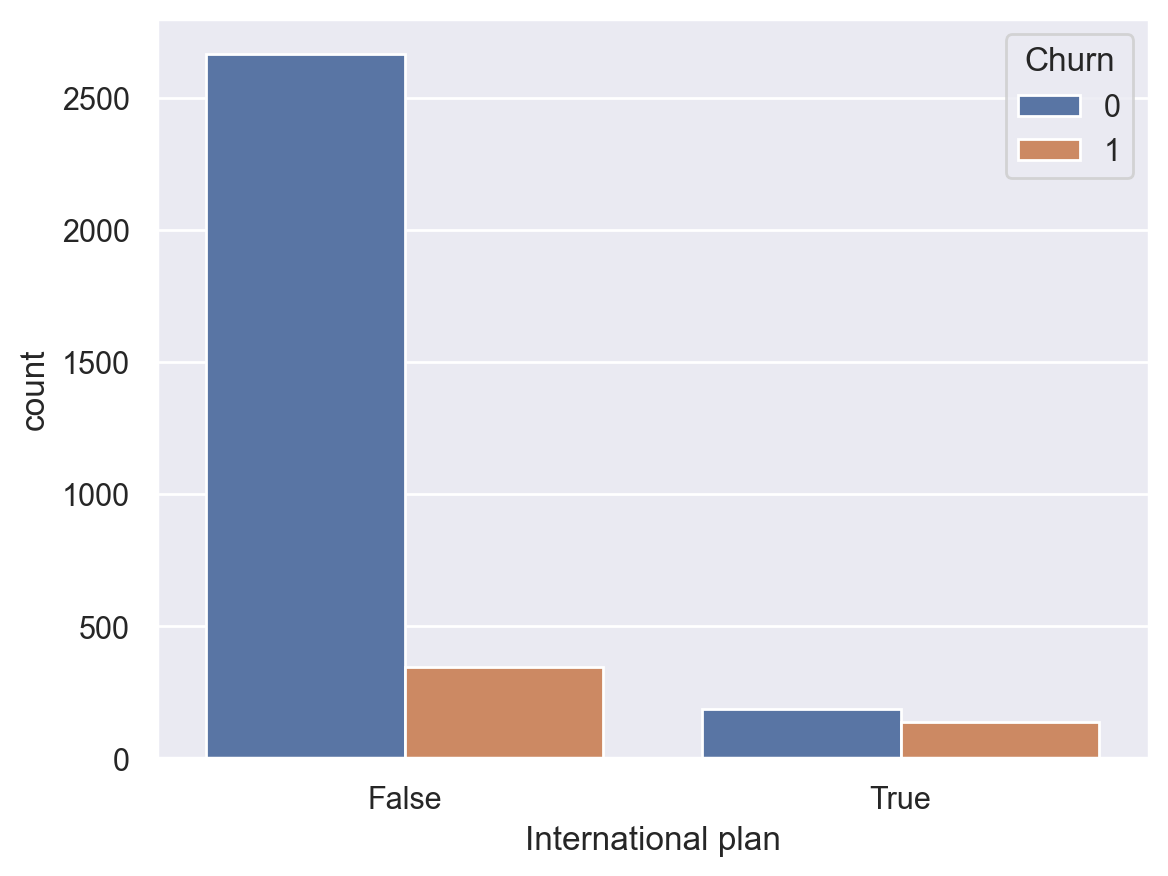

In [32]:
sns.countplot(x='International plan', hue='Churn', data=df)

In [33]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"
data = pd.read_csv(DATA_URL + "adult.data.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [34]:
data['sex'].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

In [39]:
data[data['sex'] == 'Female']['age'].describe()

count    10771.00
mean        36.86
std         14.01
min         17.00
25%         25.00
50%         35.00
75%         46.00
max         90.00
Name: age, dtype: float64

In [41]:
ger_perc = data[data['native-country'] == 'Germany'].shape[0] / data.shape[0] * 100
ger_perc

0.42074874850281013

In [44]:
print(data[data['salary'] == '>50K']['age'].mean())
print(data[data['salary'] == '>50K']['age'].std())
print(data[data['salary'] == '<=50K']['age'].mean())
print(data[data['salary'] == '<=50K']['age'].std())


44.24984058155847
10.519027719851826
36.78373786407767
14.02008849082488


<Axes: xlabel='education', ylabel='count'>

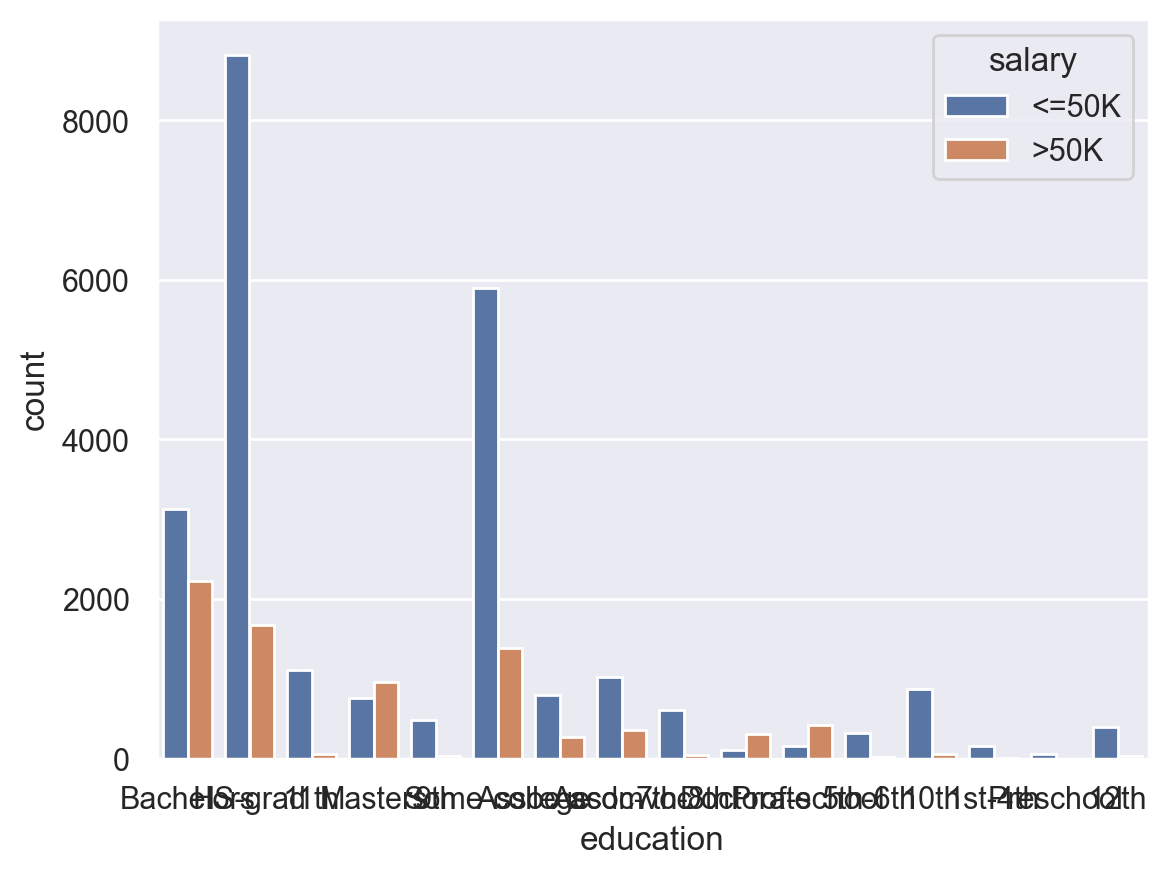

In [68]:
sns.countplot(x='education', hue='salary', data=data) 

In [67]:
data.pivot_table(
    ['education'],
    index='salary',
    aggfunc='count'
)

# I want pivot table with columns as education levels and rows as salary levels
data.groupby(['salary', 'education']).size().unstack()

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
salary,,,,,,,,,,,,,,,,
<=50K,871.0,1115.0,400.0,162.0,317.0,606.0,487.0,802.0,1021.0,3134.0,107.0,8826.0,764.0,51.0,153.0,5904.0
>50K,62.0,60.0,33.0,6.0,16.0,40.0,27.0,265.0,361.0,2221.0,306.0,1675.0,959.0,NaN,423.0,1387.0


In [85]:
# get 
data.groupby(['race', 'sex'])['age'].describe()

count   mean    std   min   25%   50%    75%  \
race               sex                                                      
Amer-Indian-Eskimo Female    119.0  37.12  13.11  17.0  27.0  36.0  46.00   
                   Male      192.0  37.21  12.05  17.0  28.0  35.0  45.00   
Asian-Pac-Islander Female    346.0  35.09  12.30  17.0  25.0  33.0  43.75   
                   Male      693.0  39.07  12.88  18.0  29.0  37.0  46.00   
Black              Female   1555.0  37.85  12.64  17.0  28.0  37.0  46.00   
                   Male     1569.0  37.68  12.88  17.0  27.0  36.0  46.00   
Other              Female    109.0  31.68  11.63  17.0  23.0  29.0  39.00   
                   Male      162.0  34.65  11.36  17.0  26.0  32.0  42.00   
White              Female   8642.0  36.81  14.33  17.0  25.0  35.0  46.00   
                   Male    19174.0  39.65  13.44  17.0  29.0  38.0  49.00   

                            max  
race               sex           
Amer-Indian-Eskimo Female  80.0  
                   Male    82.0  
Asian-Pac-Islander Female  75.0  
                   Male    90.0  
Black              Female  90.0  
                   Male    90.0  
Other              Female  74.0  
                   Male    77.0  
White              Female  90.0  
                   Male    90.0

In [104]:
data['married'] = data['marital-status'].apply(lambda x: True if 'Married' in x else False)

data.groupby('married')['salary'].value_counts(normalize=True)

married  salary
False    <=50K     0.94
         >50K      0.06
True     <=50K     0.56
         >50K      0.44
Name: proportion, dtype: float64

In [95]:
data.groupby(['salary'])['hours-per-week'].value_counts().sort_index(
  ascending=False
)

salary  hours-per-week
>50K    99                25
        98                 3
        97                 1
        96                 1
        95                 1
                          ..
<=50K   5                 53
        4                 51
        3                 38
        2                 24
        1                 18
Name: count, Length: 173, dtype: int64

<Axes: xlabel='hours-per-week', ylabel='count'>

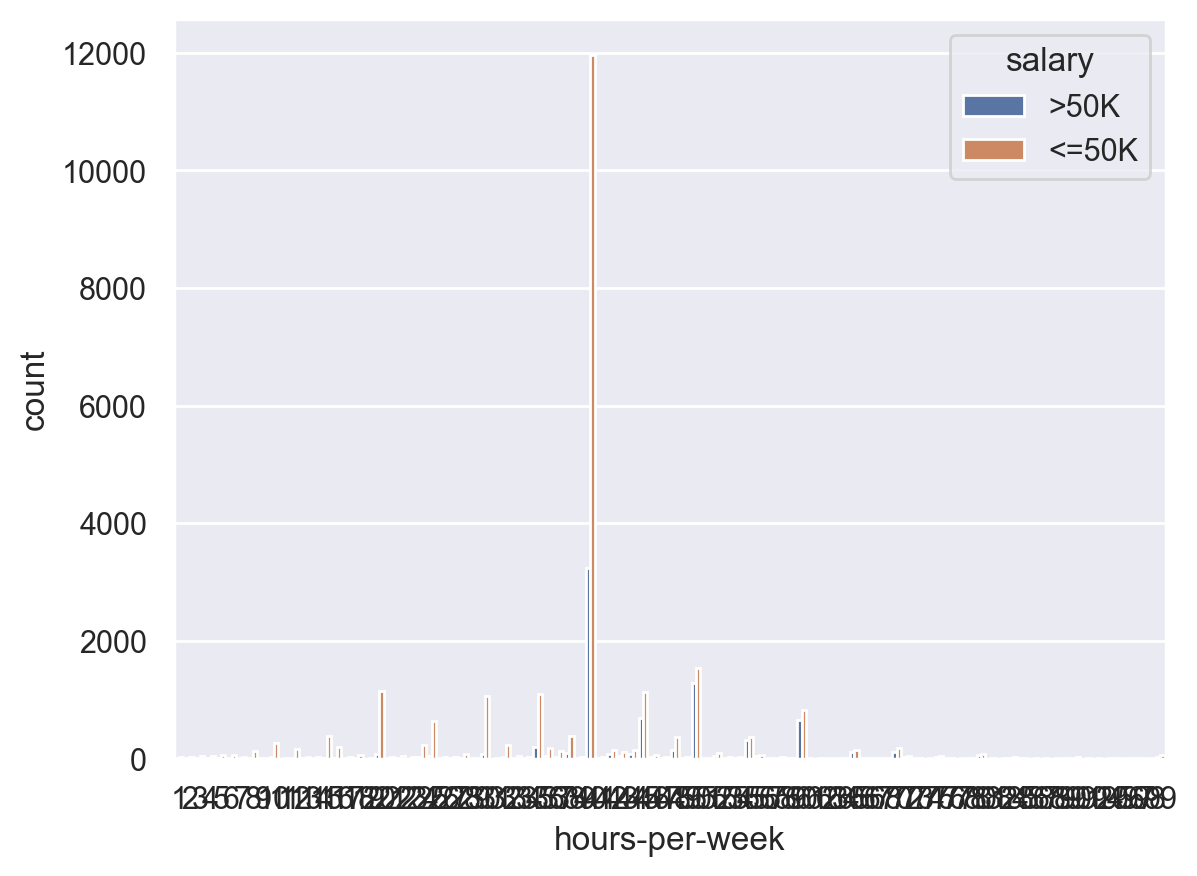

In [96]:
sns.countplot(x='hours-per-week', hue='salary', data=data)

In [97]:
data['hours-per-week'].describe()

count    32561.00
mean        40.44
std         12.35
min          1.00
25%         40.00
50%         40.00
75%         45.00
max         99.00
Name: hours-per-week, dtype: float64

In [99]:
data[data['hours-per-week'] == 99]['salary'].value_counts(normalize=True)

salary
<=50K    0.71
>50K     0.29
Name: proportion, dtype: float64

In [107]:
data.groupby(['salary', 'native-country'])['hours-per-week'].mean().unstack()

native-country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,,,,,,,,,,,,,,,,,,,,,
<=50K,40.16,41.42,37.91,37.38,38.68,37.99,42.34,38.04,36.03,40.48,...,41.94,38.47,39.44,40.16,33.77,42.87,37.06,38.80,37.19,41.6
>50K,45.55,40.00,45.64,38.90,50.00,42.44,47.00,48.75,45.00,44.53,...,41.50,39.42,46.67,51.44,46.80,58.33,40.00,45.51,39.20,49.5
